# import

In [1]:
from utils.behaviour_processing_functions import *

#### save all figures attempt:
import matplotlib.pyplot as plt
from PIL import Image

# Create a function to save all open figures in one large PNG
def save_all_figs(filename="all_plots.png", dpi=100):
    figs = [plt.figure(num) for num in plt.get_fignums()]
    if not figs:
        print("No figures to save.")
        return

    # Save each figure to a temporary image
    images = []
    for fig in figs:
        # Save each figure to a temporary buffer
        buf = f"temp_fig_{fig.number}.png"
        fig.savefig(buf, dpi=dpi)
        images.append(Image.open(buf))

    # Concatenate all images vertically
    total_width = max(im.width for im in images)
    total_height = sum(im.height for im in images)

    # Create a blank canvas for the concatenated image
    combined_image = Image.new("RGB", (total_width, total_height))

    # Paste each figure into the canvas
    y_offset = 0
    for im in images:
        combined_image.paste(im, (0, y_offset))
        y_offset += im.height

    # Save the concatenated image
    combined_image.save(filename)
    print(f"All figures saved as {filename}.")
    


In [2]:
# to do:
# motif specific errors? times the mouse diverged away from the optimal path? 

## need to move all the data to the right place

# Behaviour process loop

EJT178_1_7
Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1
Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1\recording7_30-03-2022
Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1\recording7_30-03-2022\behav_sync/2_task
head_centre
function exiting
function exiting
implant_centre
function exiting
function exiting
left_ear
function exiting
function exiting
right_ear
function exiting
function exiting
tail_base
function exiting
function exiting
port1
function exiting
function exiting
port2
function exiting
function exiting
port3
function exiting
function exiting
port6
function exiting
function exiting
port7
function exiting
function exiting
Frames dropped = 4
overlap detected
overlap detected
overlap detected


Processing segments: 100%|██████████| 164676/164676 [11:12<00:00, 244.85it/s] 


255


Processing segments: 100%|██████████| 164676/164676 [07:01<00:00, 390.89it/s]  


262


Processing segments: 100%|██████████| 164676/164676 [01:36<00:00, 1709.69it/s] 


332


Processing segments: 100%|██████████| 164676/164676 [03:00<00:00, 912.69it/s]  


393


Processing segments: 100%|██████████| 164676/164676 [07:21<00:00, 372.68it/s] 


478


100%|██████████| 5/5 [03:34<00:00, 42.83s/it]


All figures saved as Z:\projects\sequence_squad\revision_data\emmett_revisions\sleep_wake_link_data\behaviour_to_replay\processed_data\\EJT178_1_7.png.
EJT149_1_1
Z:\projects\sequence_squad\organised_data\animals\\EJT149_implant1
Z:\projects\sequence_squad\organised_data\animals\\EJT149_implant1\recording1_16-11-2021
Z:\projects\sequence_squad\organised_data\animals\\EJT149_implant1\recording1_16-11-2021\behav_sync/2_task
head_centre
function exiting
function exiting
implant_centre
function exiting
function exiting
left_ear
function exiting
function exiting
right_ear
function exiting
function exiting
tail_base
function exiting
function exiting
port1
function exiting
function exiting
port2
function exiting
function exiting
port3
function exiting
function exiting
port6
function exiting
function exiting
port7
function exiting
function exiting
Frames dropped = 5
overlap detected
overlap detected
overlap detected
overlap detected!


Processing segments: 100%|██████████| 141626/141626 [06:06<00:00, 386.68it/s] 


567


Processing segments: 100%|██████████| 141626/141626 [04:11<00:00, 562.40it/s] 


424


Processing segments: 100%|██████████| 141626/141626 [06:02<00:00, 390.95it/s] 


660


Processing segments: 100%|██████████| 141626/141626 [05:13<00:00, 451.20it/s] 


567


100%|██████████| 4/4 [01:08<00:00, 17.05s/it]


All figures saved as Z:\projects\sequence_squad\revision_data\emmett_revisions\sleep_wake_link_data\behaviour_to_replay\processed_data\\EJT149_1_1.png.


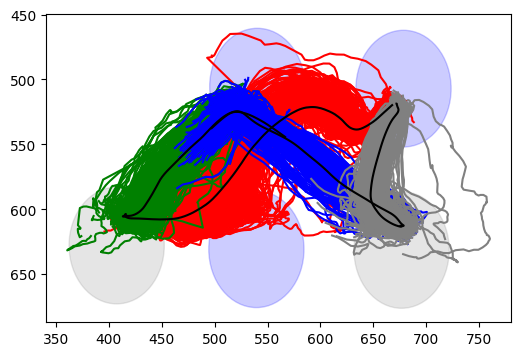

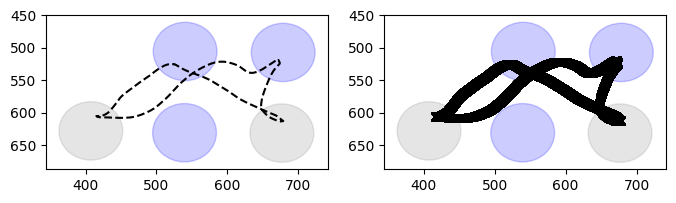

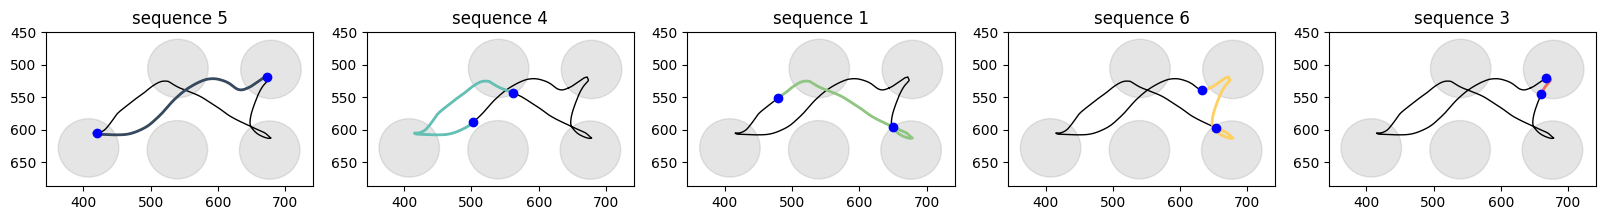

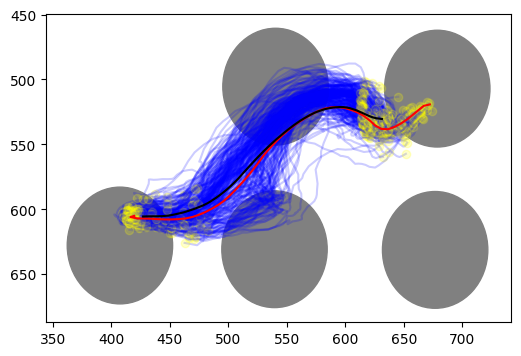

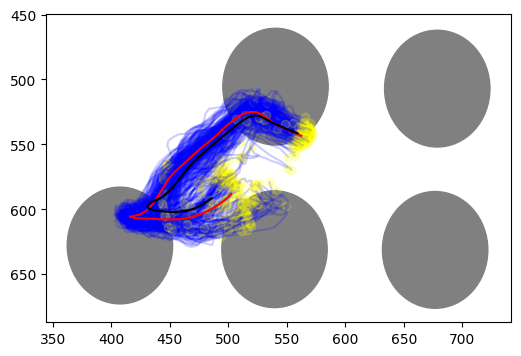

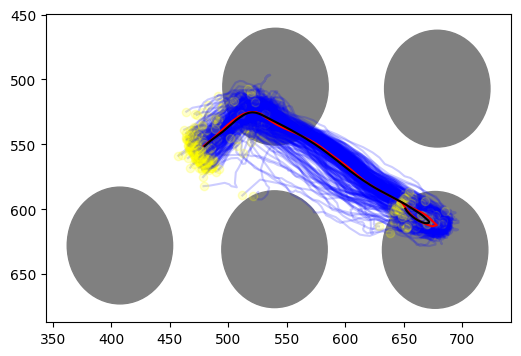

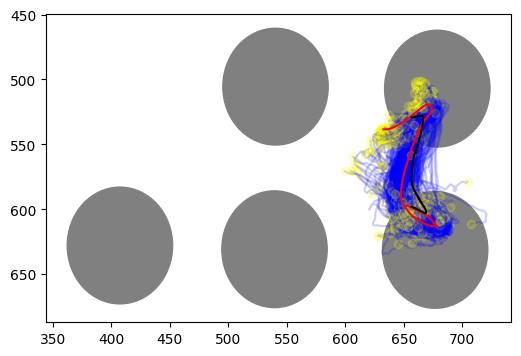

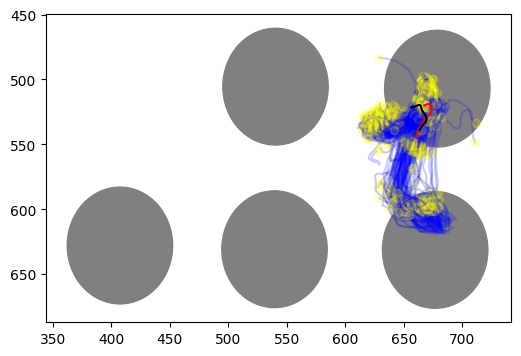

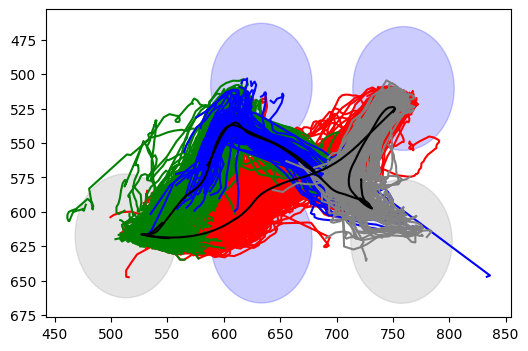

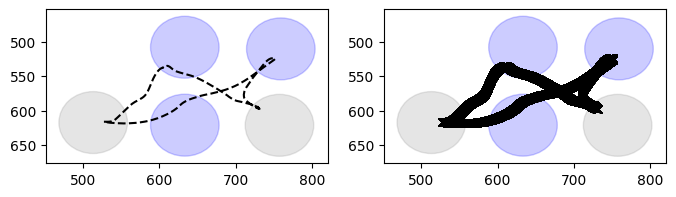

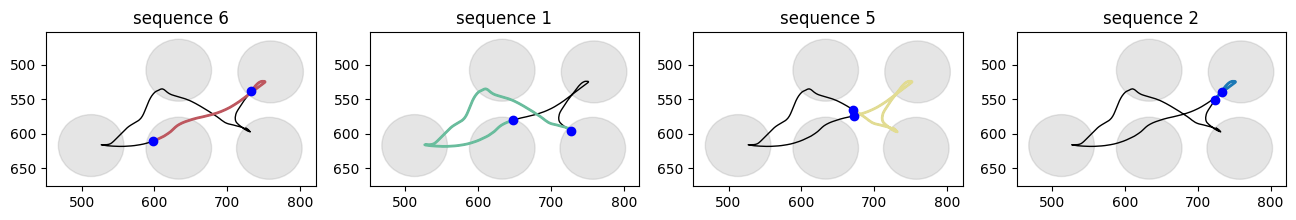

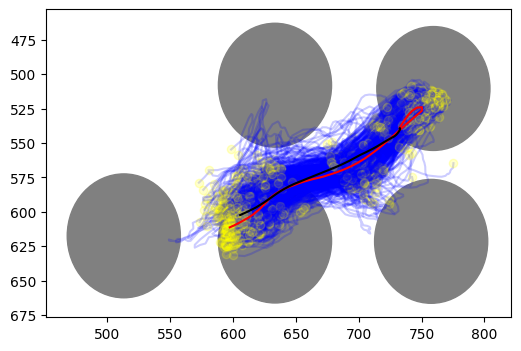

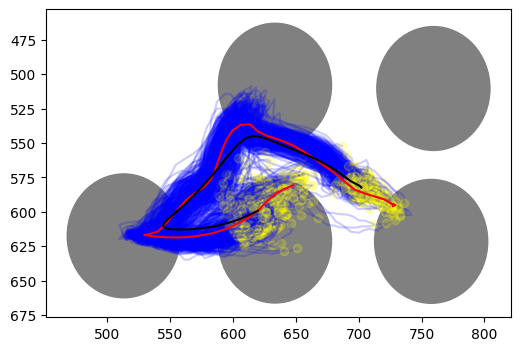

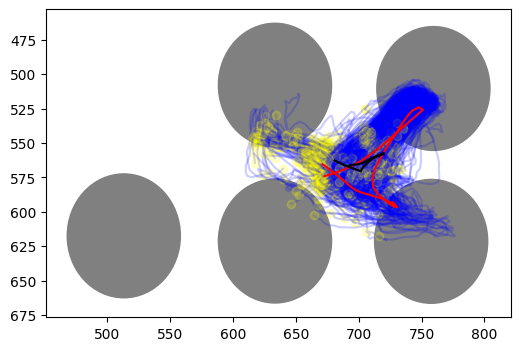

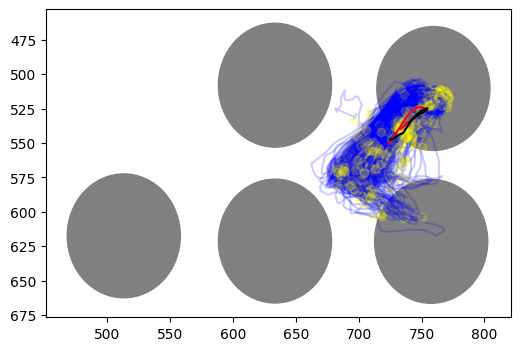

In [ ]:
dat_path = r"Z:\projects\sequence_squad\organised_data\animals\\"
# awake_ppseq_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\sleep_wake_link_data\behaviour_to_replay\awake_data\\"
awake_ppseq_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\awake\\"
out_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\sleep_wake_link_data\behaviour_to_replay\processed_data\\"

useable_mirs = ['EJT178_1_7','EJT149_1_1']

for mir in useable_mirs:
    # find organised path for each mir
    full_org_dat_path = find_organised_path(mir,dat_path)
    # load behavioural data
    behav_sync_df,transition_sync_df = load_behav_sync(full_org_dat_path)
    
    # load in awake ppseq data for the same mir and pull in linearised thingy
    awake_ppseq_base_path = find_awake_ppseq_base_path(mir,awake_ppseq_path)
    
    # load sequence order
    sequence_order = pd.read_csv(awake_ppseq_path + r'sequence_order.csv')
    # get continuous regions information
    continuous_regions_df = get_sequence_regions(mir,awake_ppseq_base_path,sequence_order)
    
    # tracking data 
    if 'EJT' in mir:
        back_head_centre_df,p1,p2,p3,p4,p5 = get_tracking_data_EJT_data(full_org_dat_path)
        
        #MAYBE I DONT NEED THIS - NOT REQUIRED THAT i ALIGN THE TRAKCING TO ANYTHING? THIS ANALYSIS IS SEPERATE? 
        # process/uncycle the raw timestamps
        camera_timestamps_df = process_raw_timestamps(full_org_dat_path)
    else:
        raise Exception("write this code Emmett!")
        
    ## extract simple metrics (number of trials, error rate, number of transitions,reward rate (vs time and vs transitions), number of each transition type)
    # number of trials
    num_trials = len(behav_sync_df.Trial_id.unique())
    # error rate
    correct_transit_rate, error_transit_rate, neutral_transit_rate = find_error_rates(transition_sync_df)
    # perfect sequence score (behavioural score)
    perf_score = get_perfect_sequence_score(transition_sync_df)
    # number of transitions
    total_transitions = len(transition_sync_df.Transition_type.values)
    # reward rate (vs time and vs transitions)
    transits_per_reward,seconds_per_reward = reward_rate(behav_sync_df)
    
    
    ############################# movement variability for each motif region ####################
    ## TRACKING PREP - laod in data, find average curves etc. 
    #############################################################################################
    
    # find task relevant tracking periods, extract times mouse is close to each behavioural port
    threshold_breaks,port_centroids,current_x,current_y,radius_used = find_task_relevant_tracking_points(back_head_centre_df,p1,p2,p3,p4,p5,radius = 45)

    ## each of these is a frame so we know the timing between them. ie. one frame is 1/60s 
    fps = 1/np.mean(np.diff(camera_timestamps_df['Time Stamps'].values))
    time_filter = 2 #in s
    frame_filter = int(time_filter / (1/fps))

    #we know when the mouse is close to each port, so find times when the mouse goes from port to port 
    start_port,end_port = 5,2
    T1_start_ind, T1_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,4,-1,-1)
    start_port,end_port = 2,3
    T2_start_ind, T2_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,4,5)
    start_port,end_port = 3,4
    T3_start_ind, T3_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,5)
    start_port,end_port = 4,5
    T4_start_ind, T4_end_ind = extract_port_to_port_trajetories(start_port,end_port,frame_filter,threshold_breaks,1,2,3)

    # find average curves by taking traject lines and make them roughly equivalent by interpolating so they have the same number of trakcing points, then for each point in each trajectory find the average xy position to create an average trajectory line 
    a_curve1,a_curve2,a_curve3,a_curve4 = find_average_curves(port_centroids,T1_start_ind,T1_end_ind,T2_start_ind,T2_end_ind,T3_start_ind,T3_end_ind,T4_start_ind,T4_end_ind,current_x,current_y,buffer = 10, radius = 45)

    # join each curve, join them at the point that they touch, or if they dont touch just join the two ends to each other
    new = join_curves(a_curve1, a_curve2,cut = True)
    new = join_curves(new, a_curve3,cut = True)
    new = join_curves(new, a_curve4,cut = True)
    # join the two ends together to make a complete circle
    complete_average = join_make_full_circle(new)

    #interpolate to make standardspace:
    standard_av_curve = resample_curve(complete_average, num_points = 10000)

    # shift the start point of the curve so that is the first time the mous eleaves port 5 radius
    standard_av_curve = shift_curve_start(standard_av_curve,port_centroids[-1])

    # plot this stuff to check it looks okay
    plot_av_and_new_standard_line(complete_average,standard_av_curve,radius_used,port_centroids)

    # load in the seq colours 
    seq_colours = np.load(awake_ppseq_base_path+ r'/analysis_output/reordered_recolored/colors',allow_pickle=True)

    ##### FIND THE MOTIF REGIONS - #################################
    # find all the examples of each motif 
    ################################################################
    
    # next define the regions of each motif 
    motif_start_ends_df = find_motif_points(continuous_regions_df,standard_av_curve,port_centroids,seq_colours,radius_used,num_intermediate_points=50)

    #convert to xy coords
    full_tracking_coords = []
    for ind_,item in enumerate(current_x):
        full_tracking_coords += [[item,current_y[ind_]]]

    # now take these start and end points of each motif to find all motif examples:
    motif_start_ends = []
    for i in range(len(motif_start_ends_df)):

        points = []
        for column in list(motif_start_ends_df):
            row = motif_start_ends_df[(f'{column}')][i]
            points += [row]
            
        centroid_distance_threshold = 1000000  # You need to set an appropriate threshold based on your data.
        radius_threshold = 30
        similar_segments = find_similar_segments(full_tracking_coords, points, centroid_distance_threshold,radius_threshold)
        ## each of these is a frame so we know the timing between them. ie. one frame is 1/60s 
        time_filter = 6 #in s
        # minimum distance from start/end centroid
        dist_filter = 60
        # number of closest points to start/end centroid to find and chose from
        num_points = 3
        # number of points to add to the start and end of the trajectory
        add_start_end = 5
        valid_trajectories = process_and_validate_trajectories(full_tracking_coords, similar_segments, points,add_start_end,int(time_filter / (1/fps)),dist_filter,num_points)

        # then remove any duplicates:
        valid_trajectories_filtered = remove_overlaps(valid_trajectories)

        fig, ax = plt.subplots(1, 1,figsize=(6, 4))
        for index,port_centroid in enumerate(port_centroids):
            circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
            ax.add_patch(circle1)

        trajects = []
        for ind in valid_trajectories_filtered:
            traject = full_tracking_coords[ind[0]:ind[1]]
            trajects += [traject]
            x = [point[0] for point in traject]
            y = [point[1] for point in traject]
            ax.plot(x,y,'-', color = 'blue', alpha = 0.2)
            ax.plot(x[0],y[0],'o', color = 'yellow', alpha = 0.2)
            ax.plot(x[-1],y[-1],'o', color = 'yellow', alpha = 0.2)

        x = [point[0] for point in points]
        y = [point[1] for point in points]
        ax.plot(x,y,'-', color = 'red', alpha = 1)

        av_of_found = interpolate_to_longest_and_find_average_curve(trajects,500)
        x = [point[0] for point in av_of_found]
        y = [point[1] for point in av_of_found]
        ax.plot(x,y,'-', color = 'k', alpha = 1)
            
        ax.invert_yaxis()

        print(len(valid_trajectories_filtered))
        
        motif_start_ends += [valid_trajectories_filtered]
    
    ##### FIND THE MOVEMENT VARIABILITY FOR EACH MOTIF - ########################################
    # using two different methods, h distance and dtw
    #############################################################################################

    # needs to be large to make the h distance calcualtions accurate
    motif_start_ends_df_large = find_motif_points(continuous_regions_df,standard_av_curve,port_centroids,seq_colours,radius_used,num_intermediate_points=10000)
    plt.close()
    # slightly smaller to save computational power when doing dtw
    motif_start_ends_df_medium = find_motif_points(continuous_regions_df,standard_av_curve,port_centroids,seq_colours,radius_used,num_intermediate_points=300)
    plt.close()

    motif_dists = []
    motif_std_dists = []
    motif_median_dtws = []
    motif_std_dtws = []
    for i in tqdm(range(len(motif_start_ends_df_large))):

        points = []
        for column in list(motif_start_ends_df_large):
            row = motif_start_ends_df_large[(f'{column}')][i]
            points += [row]
            
        points2 = []
        for column in list(motif_start_ends_df_medium):
            row = motif_start_ends_df_medium[(f'{column}')][i]
            points2 += [row]

        motif_ranges = motif_start_ends[i]
        median_distances = []
        std_distances = []
        dtws = []
        for start, end in motif_ranges:
            segment = full_tracking_coords[start:end]
            
            """ 
            a simplified version of the Hausdorff distance
            "" Measures the greatest distance between any point on one trajectory to the closest point on the other.
            determine deviation from average
            - for each tracking point in each trajectory find the point on the relevant interpolated average line which it is closest to
            - this gives us a list of distances (deviations) from the average for each trajectory line
            - this can be used to find the standard devation of the average distance from the average line.
            - this gives us a meausre of how steretyped the port-port trjectories were:
            - stereotyped = similar to average line = smaller devation
            - not stereotyped = different to average line = larger devation ""
            """ 
            distances = closest_points_distances(segment, points)
            median_distances.append(np.median(distances))
            std_distances.append(np.std(distances))
            
            """
            dynamic time warping distance 
            WHAT IS THE DTW NUMBER:
            here i take the mean , so the number represents, trajectories, when optimally aligned to teh average line, the mean amount by which they deviate in total (here in mm). This doesn't necessarily mean each corresponding point deviates that many mm—
            it's the total sum of all point-to-point deviations, which can vary depending on the trajectory.
            eg. "The Dynamic Time Warping (DTW) distance between the two trajectories was xx mm, representing the total accumulated deviation over the entire alignment."
            I calculate the dwt normalised to length of the trajectory
            """
            dtws += [normalized_dtw(segment, points2)]
            
                    
        # for h distance 
        motif_dists.append(median_distances)
        motif_std_dists.append(std_distances)
        # for dtw
        motif_median_dtws.append(np.mean(dtws))
        motif_std_dtws.append(np.std(dtws))

    # put the data into vars
    all_motif_mean_dists = [np.mean(dist) for dist in motif_dists]
    all_motif_std_dists = [np.mean(std_dist) for std_dist in motif_std_dists]


    ## convert to cm, we know distance bwteen two ports should be 3cm apart
    port_pairs = [0,1],[0,3],[2,4],[0,2],[3,4]
    ptp_distances = []
    for pair in port_pairs:
        ptp_distances += [math.sqrt((port_centroids[pair[0]][0] - port_centroids[pair[1]][0])**2 + (port_centroids[pair[0]][-1] - port_centroids[pair[1]][-1])**2)]
    _1_mm = (np.mean(ptp_distances)/3)/10 

    all_motif_mean_dists_mm = np.array(all_motif_mean_dists)/_1_mm
    all_motif_std_dists_mm = np.array(all_motif_std_dists)/_1_mm

    all_motif_mean_dtws_mm = np.array(motif_median_dtws)/_1_mm
    all_motif_std_dtws_mm = np.array(motif_std_dtws)/_1_mm
        
    #############################################################################################
    ### FIND VARIANCE IN TIME TAKEN TO DO EACH MOTIF - also average movement speed
    #############################################################################################
    
    # average speed - distance over time
    # speed variability, 

    all_motif_mean_speed_mm_s = []
    all_motif_mean_std_speed_mm_s = []
    for motif_ranges in motif_start_ends:
        segments = []
        for start, end in motif_ranges:
            segments += [full_tracking_coords[start:end]]
        # Calculate average speeds and speed variability
        speed_std,speed_mean = calculate_speed_variability(segments, _1_mm, fps)

        all_motif_mean_speed_mm_s += [speed_mean]
        all_motif_mean_std_speed_mm_s += [speed_std]

    
    ### make a df for the behavioural data i have collected:
    # Create the DataFrame with the existing variables
    pokedata_output_df = pd.DataFrame({
        "num_trials": [num_trials],
        "correct_transit_rate": [correct_transit_rate],
        "error_transit_rate": [error_transit_rate],
        "neutral_transit_rate": [neutral_transit_rate],
        "perf_score": [perf_score],
        "total_transitions": [total_transitions],
        "transits_per_reward": [transits_per_reward],
        "seconds_per_reward": [seconds_per_reward]
    })  
    tracking_output_df = pd.DataFrame({
        "sequence_motif" : continuous_regions_df.sequence.values+1,
        "mean_h_distance_from_av_mm": all_motif_mean_dists_mm,
        "std_h_distance_from_av_mm": all_motif_std_dists_mm,
        "mean_dtw_distance_from_av_mm":all_motif_mean_dtws_mm,
        "std_dtw_distance_from_av_mm":all_motif_std_dtws_mm,
        "mean_movement_speed_mm_s": all_motif_mean_speed_mm_s,
        "std_movement_speed_mm_s": all_motif_mean_std_speed_mm_s   
    })
     
      
    ## save data somewhere  
    full_out_path = out_path+mir
    if not os.path.isdir(full_out_path):
        os.makedirs(full_out_path)
    pokedata_output_df.to_csv(full_out_path + r'/processed_poke_data.csv',index=False)
    tracking_output_df.to_csv(full_out_path + r'/processed_tracking_data.csv',index=False)
        
    # Save all figures  
    save_all_figs(out_path + mir + r".png")
    plt.close('all')

# Garbage / Dump:

In [ ]:
motif_start_ends_df_large = find_motif_points(continuous_regions_df,standard_av_curve,port_centroids,seq_colours,num_intermediate_points=100)
plt.close()

motif_median_dtws = []
motif_std_dtws = []
for i in tqdm(range(len(motif_start_ends_df_large))):

    points = []
    for column in list(motif_start_ends_df_large):
        row = motif_start_ends_df_large[(f'{column}')][i]
        points += [row]

    motif_ranges = motif_start_ends[i]
    median_distances = []
    std_distances = []

    dtws = []
    for start, end in motif_ranges:
        segment = full_tracking_coords[start:end]



100%|██████████| 5/5 [00:17<00:00,  3.43s/it]


In [470]:
import numpy as np

def compute_perpendicular_lines(ideal_points, lengths):
    """Compute the perpendicular lines for the ideal path."""
    lines = []
    for i, point in enumerate(ideal_points):
        if i == 0:
            length = lengths['start']
            direction = ideal_points[i + 1] - point
        elif i == len(ideal_points) - 1:
            length = lengths['end']
            direction = point - ideal_points[i - 1]
        else:
            length = lengths['intermediate']
            direction = ideal_points[i + 1] - ideal_points[i - 1]

        # Compute the perpendicular vector
        perp_direction = np.array([-direction[1], direction[0]])
        perp_direction = perp_direction / np.linalg.norm(perp_direction)  # Normalize
        line_start = point + perp_direction * (length / 2)
        line_end = point - perp_direction * (length / 2)
        lines.append((line_start, line_end))
    return lines

def find_trajectories_optimized(tracking_data, ideal_points, lines, direction_window=5, tolerance=1e-3):
    """Optimized function to find matching trajectories in the tracking data with a progress bar."""
    trajectories = []
    current_trajectory = []

    # Precompute normalized line directions to avoid recalculating them repeatedly
    line_directions = [
        (line_end - line_start) / np.linalg.norm(line_end - line_start)
        for line_start, line_end in lines
    ]

    # Iterate through tracking data with a progress bar
    for i in tqdm(range(len(tracking_data)), desc="Finding Trajectories", unit="step"):
        if i < direction_window:
            continue  # Skip until we have enough points to compute directionality

        # Compute the tracking directionality using the most recent points
        recent_points = tracking_data[i - direction_window:i]
        direction = recent_points[-1] - recent_points[0]
        direction = direction / np.linalg.norm(direction)  # Normalize direction

        for j, (line_start, line_end) in enumerate(lines):
            if j < len(current_trajectory):
                continue  # Skip lines already matched in the current trajectory

            # Quickly filter out points that are not within a bounding box of the line
            if not (min(line_start[0], line_end[0]) - tolerance <= tracking_data[i, 0] <= max(line_start[0], line_end[0]) + tolerance and
                    min(line_start[1], line_end[1]) - tolerance <= tracking_data[i, 1] <= max(line_start[1], line_end[1]) + tolerance):
                continue

            # Check directionality (dot product with the precomputed line direction)
            dot_product = np.dot(direction, line_directions[j])
            if dot_product < 0:  # Moving in the opposite direction
                continue

            # Check if the tracking point is close enough to the line (vectorized cross product)
            line_vector = line_end - line_start
            line_to_point = tracking_data[i] - line_start
            cross_product = np.cross(line_vector, line_to_point)

            # Check if the point is close enough to the line
            if abs(cross_product / np.linalg.norm(line_vector)) < tolerance:
                current_trajectory.append(i)
                break

        # If the current trajectory has matched all ideal points, store it
        if len(current_trajectory) == len(ideal_points):
            trajectories.append(current_trajectory)
            current_trajectory = []

    return trajectories

#convert to xy coords
full_tracking_coords = []
for ind_,item in enumerate(current_x):
    full_tracking_coords += [[item,current_y[ind_]]]
    
## each of these is a frame so we know the timing between them. ie. one frame is 1/60s 
# fps = 1/np.mean(np.diff(camera_timestamps_df['Time Stamps'].values))
# time_filter = 4 #in s
# frame_filter = int(time_filter / (1/fps))

for i in range(len(motif_start_ends_df)):
    points = []
    for column in list(motif_start_ends_df):
        row = motif_start_ends_df[(f'{column}')][i]
        points += [row]

    lengths = {'start': 200, 'intermediate': 200, 'end': 200}
    lines = compute_perpendicular_lines(points, lengths)
    trajectories = find_trajectories_optimized(np.array(full_tracking_coords), points, lines, direction_window=5, tolerance = 4)

    print(len(trajectories))
    break

Finding Trajectories:  96%|█████████▌| 158006/164727 [00:01<00:00, 107625.38step/s]C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_23404\3566702063.py:44: RuntimeWarning: invalid value encountered in divide
  direction = direction / np.linalg.norm(direction)  # Normalize direction
Finding Trajectories: 100%|██████████| 164727/164727 [00:01<00:00, 92301.93step/s] 

414


414


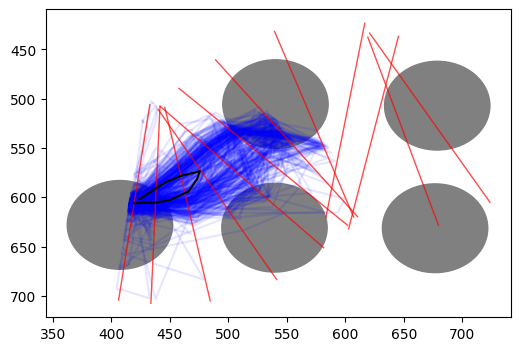

In [471]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4))
for index,port_centroid in enumerate(port_centroids):
    circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
    ax.add_patch(circle1)

trajects = []
for inds in trajectories:
    traject = np.array(full_tracking_coords)[inds]
    trajects += [traject]
    x = [point[0] for point in traject]
    y = [point[1] for point in traject]
    ax.plot(x,y,'-', color = 'blue', alpha = 0.1)
        
for line_start, line_end in lines:
    x_values = [line_start[0], line_end[0]]
    y_values = [line_start[1], line_end[1]]
    plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=1, label='Perpendicular Line', alpha = 0.7)



av_of_found = interpolate_to_longest_and_find_average_curve(trajects,1000)
x = [point[0] for point in av_of_found]
y = [point[1] for point in av_of_found]
ax.plot(x,y,'-', color = 'k', alpha = 1)

ax.invert_yaxis()
print(len(trajectories))

In [358]:
def closest_point_on_curve(curve, port):
    """
    Finds the closest point on the curve to the given port.
    
    curve: List of (x, y) tuples representing the curve (circular path).
    port: (x, y) tuple representing the port location.
    
    Returns a tuple (closest_point, index) where:
      - closest_point is the (x, y) closest point on the curve.
      - index is the index of the closest point in the curve.
    """
    distances = [distance.euclidean(port, point) for point in curve]
    closest_idx = np.argmin(distances)
    return curve[closest_idx], closest_idx

def associate_ports_with_curve(curve, ports):
    """
    Associates each port with the closest deliberate visit on the curve, moving chronologically.
    
    curve: List of (x, y) tuples representing the curve (circular path).
    ports: List of (x, y) tuples representing the port locations in the order of visits.
    
    Returns a list of (port, closest_point_on_curve, percentage) tuples where:
      - closest_point_on_curve is the closest (x, y) point on the curve.
      - percentage is the location of the closest point as a percentage of the curve length.
    """
    visited_ports = []
    percentage_locations = []
    curve_length = len(curve)  # Total number of points on the curve
    
    for port in ports:
        # Find the closest point to the current port and its index
        closest_point, closest_idx = closest_point_on_curve(curve, port)
        
        # Calculate the percentage position along the curve
        percentage = (closest_idx / curve_length) * 100
        
        # Add the port, closest point, and percentage to the list
        visited_ports.append(closest_point)
        percentage_locations.append(percentage)
    
    return visited_ports,percentage_locations

def find_closest_ports(percentage_locations, segments):
    """
    Finds the closest ports (excluding the first port) that enclose each segment:
      - Closest port to the segment's start.
      - Closest port to the segment's end.
      - Adjusts the start port if it matches the end port.
    
    percentage_locations: List of percentages representing port positions on the curve.
                          Ports are labeled 1, 2, 3, 4, 5 in the order of appearance.
    segments: List of (start_percentage, end_percentage) tuples representing segments.
    
    Returns a list of (segment, (start_port_idx, end_port_idx)) tuples representing the
    indices of the closest ports.
    """
    results = []
    num_ports = len(percentage_locations)

    for start, end in segments:
        start_port_idx = None
        end_port_idx = None

        # Find the closest port to the start (ignoring the first port)
        min_start_diff = float("inf")
        for i in range(1, num_ports):  # Skip the first port
            diff = abs(percentage_locations[i] - start)
            if diff < min_start_diff:
                min_start_diff = diff
                start_port_idx = i

        # Find the closest port to the end (ignoring the first port)
        min_end_diff = float("inf")
        for i in range(1, num_ports):  # Skip the first port
            diff = abs(percentage_locations[i] - end)
            if diff < min_end_diff:
                min_end_diff = diff
                end_port_idx = i

        # Ensure start and end ports are different
        if start_port_idx == end_port_idx:
            start_port_idx = (end_port_idx - 1) % num_ports  # Move one port earlier
            if start_port_idx == 0:  # Wrap around to port 4 if it ends up being 0
                start_port_idx = 4

        results.append([start_port_idx, end_port_idx])

    return results

[[4, 1], [1, 2], [2, 3], [3, 4], [3, 4]]


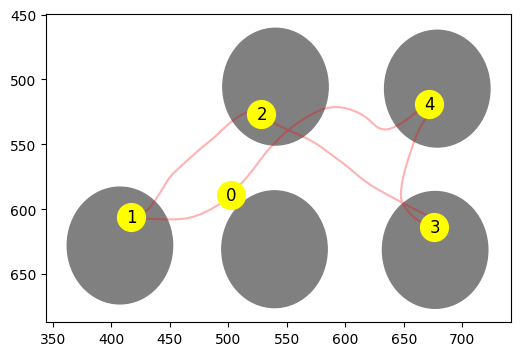

In [361]:
# define 'port' positions on the average curve, ie. the closest point on the trajectory to each port...when the mouse would have poked its nose 
visited_ports_locations,visited_ports_prcnt = associate_ports_with_curve(standard_av_curve,port_centroids)

## plot this for good measure
fig, ax = plt.subplots(1, 1,figsize=(6, 4))
for index,port_centroid in enumerate(port_centroids):
    circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
    ax.add_patch(circle1)
x = [point[0] for point in standard_av_curve]
y = [point[1] for point in standard_av_curve]
ax.plot(x,y,'-', color = 'red', alpha = 0.3)
for i, point in enumerate(visited_ports_locations):
    ax.plot(point[0], point[1], 'o',c = 'yellow', markersize=20)
    ax.text(point[0]-4, point[1]+4, str(i), fontsize=12)
ax.invert_yaxis()

# find reasonable port to port approximations for the motifs
segments= []
for i,row in continuous_regions_df.iterrows():
    segments.append((row.start,row.end))

start_end_port = find_closest_ports(visited_ports_prcnt, segments)
print(start_end_port)

# find these port-port trajectories and extend them, then trim them down to motif trajectories by using the start and end points of each motif


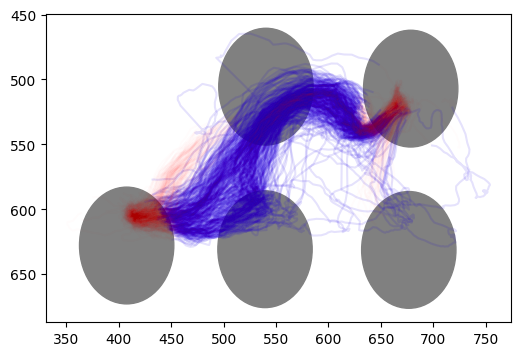

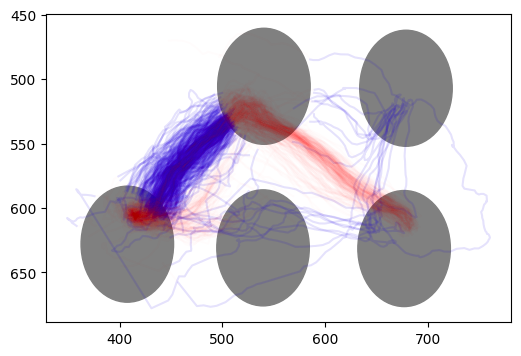

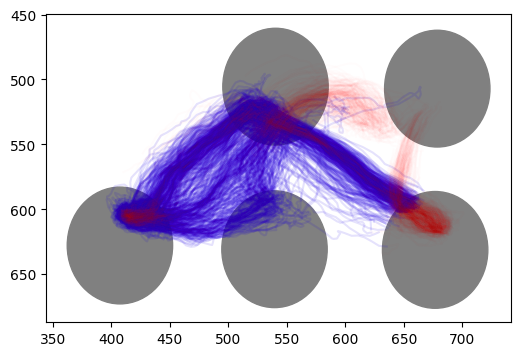

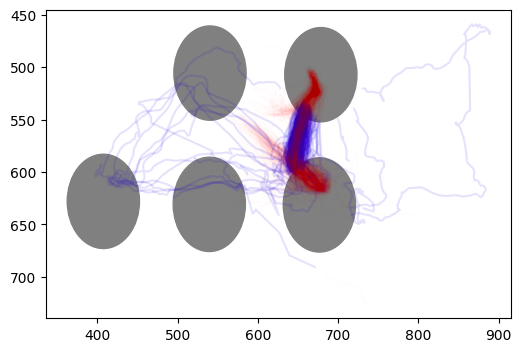

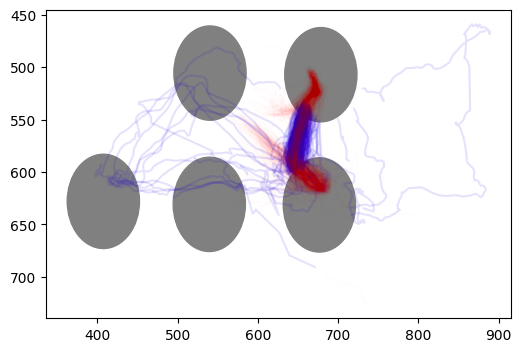

In [392]:
# recalculate threshold breaks with a larger radisu 
new_threshold_breaks,_,_,_,_ = find_task_relevant_tracking_points(back_head_centre_df,p1,p2,p3,p4,p5,radius = 60)

# set time filter 
time_filter = 4 #in s
for start,end in start_end_port:
    start_port,end_port = start+1,end+1
    start_ind, end_ind = extract_port_to_port_trajetories(start_port,end_port,int(time_filter / (1/fps)),new_threshold_breaks,-1,-1,-1)

    
    fig, ax = plt.subplots(1, 1,figsize=(6, 4))
    for index,port_centroid in enumerate(port_centroids):
        circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
        ax.add_patch(circle1)


    #convert to xy coords
    coords = []
    for ind_,item in enumerate(current_x):
        coords += [[item,current_y[ind_]]]

    for i in range(len(start_ind)):
        traject = coords[start_ind[i]:end_ind[i]]
        x = [point[0] for point in traject]
        y = [point[1] for point in traject]
        ax.plot(x,y,'-', color = 'blue', alpha = 0.1)
        
        
    start_ind = np.array(start_ind) - 30
    end_ind = np.array(end_ind) + 30
            
    for i in range(len(start_ind)):
        traject = coords[start_ind[i]:end_ind[i]]
        x = [point[0] for point in traject]
        y = [point[1] for point in traject]
        ax.plot(x,y,'-', color = 'red', alpha = 0.01)
        
    
    ax.invert_yaxis()
    


In [341]:
def find_best_enclosing_ports(percentage_locations, segments):
    """
    Finds the best port combination that envelopes each segment in the specified order.
    
    percentage_locations: List of percentages representing port positions on the curve.
                          Ports are labeled 1, 2, 3, 4, 5 in the order of appearance.
    segments: List of (start_percentage, end_percentage) tuples representing segments.
    
    Returns a list of (segment, enclosing_combination) tuples where:
      - enclosing_combination is one of ('5-2', '5-3', '3-5', '4-2', '4-3').
    """
    port_order = [1, 2, 3, 4, 5]  # Port labels
    combinations = {
        "5-2": (5, 2),
        "5-3": (5, 3),
        "3-5": (3, 5),
        "4-2": (4, 2),
        "4-3": (4, 3),
        "2-5": (2, 5),
        "5-4": (5, 4),
    }
    
    results = []

    for start, end in segments:
        best_combination = None

        for combo_name, (start_port, end_port) in combinations.items():
            start_port_idx = port_order.index(start_port)
            end_port_idx = port_order.index(end_port)

            # Ensure the combination goes in the correct direction
            if start_port_idx < end_port_idx:
                start_percentage = percentage_locations[start_port_idx]
                end_percentage = percentage_locations[end_port_idx]

                # Check if the combination envelops the segment
                if start_percentage <= start and end_percentage >= end:
                    best_combination = combo_name
                    break  # Take the first valid combination (you can change this logic if needed)

        results.append(((start, end), best_combination))

    return results

segments= []
for i,row in continuous_regions_df.iterrows():
    segments.append((row.start,row.end))

results = find_best_enclosing_ports(visited_ports_prcnt, segments)

for segment, enclosing_combination in results:
    print(f"Segment {segment}:")
    if enclosing_combination:
        print(f"  Enclosed by combination: {enclosing_combination}")
    else:
        print(f"  No valid enclosing combination found")


Segment (97.42734635540734, 34.49261553120533):
  Enclosed by combination: 3-5
Segment (25.297760838494522, 58.69461648404002):
  No valid enclosing combination found
Segment (49.59504525964745, 82.0867079561696):
  Enclosed by combination: 2-5
Segment (77.08432586946165, 99.61886612672701):
  No valid enclosing combination found
Segment (93.37779895188186, 94.14006669842783):
  Enclosed by combination: 3-5


In [333]:
def find_ports_encompassing_segments(visited_ports, percentage_locations, segments):
    """
    Finds the ports that encompass each segment (one before the start and one after the end).
    
    visited_ports: List of (x, y) tuples representing the closest points on the curve for each port.
    percentage_locations: List of percentages corresponding to each port's closest point on the curve.
    segments: List of (start_percentage, end_percentage) tuples representing segments.
    
    Returns a list of (segment, start_port, end_port) tuples where:
      - start_port is the closest port just before the segment starts.
      - end_port is the closest port just after the segment ends.
    """
    results = []
    # Combine ports and their percentages for easier manipulation
    ports_with_percentages = list(zip(visited_ports, percentage_locations))
    # Ensure they are sorted by percentage
    ports_with_percentages.sort(key=lambda x: x[1])  # Sort by percentage

    for start, end in segments:
        if start <= end:
            # Standard segment (no wrapping around)
            start_port = max((p for p in ports_with_percentages if p[1] <= start), key=lambda p: p[1], default=None)
            end_port = min((p for p in ports_with_percentages if p[1] >= end), key=lambda p: p[1], default=None)
        else:
            # Wrapping segment (e.g., 95% to 10%)
            start_port = max((p for p in ports_with_percentages if p[1] <= start), key=lambda p: p[1], default=None)
            end_port = min((p for p in ports_with_percentages if p[1] >= end or p[1] <= end), key=lambda p: p[1], default=None)

        results.append(((start, end), start_port, end_port))
    
    return results




segments= []
for i,row in continuous_regions_df.iterrows():
    segments.append((row.start,row.end))

results = find_ports_encompassing_segments(visited_ports_locations, visited_ports_prcnt, segments)

for segment, start_port, end_port in results:
    print(f"Segment {segment}:")
    if start_port:
        print(f"  Start Port: {start_port[0]} at {start_port[1]:.2f}%")
    else:
        print(f"  Start Port: None")
    if end_port:
        print(f"  End Port: {end_port[0]} at {end_port[1]:.2f}%")
    else:
        print(f"  End Port: None")




Segment (97.42734635540734, 34.49261553120533):
  Start Port: [671.80804539 518.7436711 ] at 95.50%
  End Port: [502.16766943 588.80675977] at 23.36%
Segment (25.297760838494522, 58.69461648404002):
  Start Port: [502.16766943 588.80675977] at 23.36%
  End Port: [675.94692119 613.45901738] at 79.57%
Segment (49.59504525964745, 82.0867079561696):
  Start Port: [416.5447853  606.17910584] at 35.66%
  End Port: [671.80804539 518.7436711 ] at 95.50%
Segment (77.08432586946165, 99.61886612672701):
  Start Port: [528.14821453 526.76709226] at 55.50%
  End Port: None
Segment (93.37779895188186, 94.14006669842783):
  Start Port: [675.94692119 613.45901738] at 79.57%
  End Port: [671.80804539 518.7436711 ] at 95.50%


In [425]:
##### finding trajectories

def is_within_radius_np(points, center, radius):
    """Efficiently checks if points are within a given radius of a center using NumPy."""
    points = np.array(points)
    center = np.array(center)
    return np.linalg.norm(points - center, axis=1) <= radius

def find_transition_times(start_center, end_center, intermediate_centers, trajectory, frame_filter, radius_start_end, radius_intermediate,add_points):
    """
    Finds unique trajectory transitions by scanning chronologically.
    
    - Each transition starts when tracking enters the start radius.
    - If tracking exits & re-enters the start radius, restart search.
    - The transition must reach the end radius and pass all intermediates.
    - The actual start & end points are adjusted to the closest positions to their centers.
    - Adds 20 points to the start and end of the trajectory before trimming.
    """
    trajectory = np.array(trajectory)  # Convert trajectory to NumPy array for faster operations
    transitions = []
    
    # Compute masks for start, end, and intermediate zones
    start_mask = is_within_radius_np(trajectory, start_center, radius_start_end)
    end_mask = is_within_radius_np(trajectory, end_center, radius_start_end)
    intermediate_masks = [is_within_radius_np(trajectory, center, radius_intermediate) for center in intermediate_centers]

    searching_for_start = True
    start_idx = None
    
    for i in tqdm(range(len(trajectory)), desc="Processing Trajectories"):
        if searching_for_start:
            # Look for an entry into the start radius
            if start_mask[i] and (i == 0 or not start_mask[i - 1]):  # Entry detected
                start_idx = i
                searching_for_start = False  # Now looking for a valid transition
        else:
            # Check if it re-enters the start radius before reaching the end → Discard and restart
            if i > start_idx and start_mask[i] and not start_mask[i - 1]:
                searching_for_start = True  # Restart search
                start_idx = None
                continue

            # Look for an end point within frame_filter
            if end_mask[i] and (i - start_idx) <= frame_filter:
                # Continue tracking within the end radius to find the closest point before exit
                exit_idx = i
                # while exit_idx + 1 < len(trajectory) and end_mask[exit_idx + 1]:
                #     exit_idx += 1  # Move forward while inside the end radius
                
                # Check if all intermediate areas were visited at least once
                passed_intermediates = np.array([np.any(mask[start_idx:exit_idx]) for mask in intermediate_masks])
                
                if passed_intermediates.all():  # Must have passed through all intermediates
                    # Add points before the start and after the end
                    extended_start_idx = max(0, start_idx - add_points)
                    extended_end_idx = min(len(trajectory) - 1, exit_idx + add_points)
                    
                    # # Trim to the closest start & end points within the radius
                    # start_candidates = np.where(start_mask[extended_start_idx:exit_idx])[0] + extended_start_idx
                    # end_candidates = np.where(end_mask[start_idx:extended_end_idx])[0] + start_idx
                    
                    # if len(start_candidates) == 0 or len(end_candidates) == 0:
                    #     continue  # Skip if no valid start or end candidates found

                    # closest_start = start_candidates[np.argmin(np.linalg.norm(trajectory[start_candidates] - np.array(start_center), axis=1))]
                    # closest_end = end_candidates[np.argmin(np.linalg.norm(trajectory[end_candidates] - np.array(end_center), axis=1))]
                    
                    # transitions.append((closest_start, closest_end))
                    transitions.append((extended_start_idx, extended_end_idx))
                    searching_for_start = True  # Restart search for next valid transition
                    start_idx = None  # Reset for next search

    return transitions



##### filtering of trajectories

def is_within_radius_np(points, center, radius):
    """Efficiently checks if points are within a given radius of a center using NumPy."""
    points = np.array(points)
    center = np.array(center)
    return np.linalg.norm(points - center, axis=1) <= radius

def precompute_segments(start_center, end_center, intermediate_centers):
    """
    Precomputes the vectors and lengths of the line segments forming the ideal path.
    """
    ideal_points = np.array([start_center] + intermediate_centers + [end_center])
    segment_starts = ideal_points[:-1]
    segment_ends = ideal_points[1:]
    segment_vectors = segment_ends - segment_starts
    segment_lengths_sq = np.einsum('ij,ij->i', segment_vectors, segment_vectors)  # Squared lengths

    return segment_starts, segment_ends, segment_vectors, segment_lengths_sq

def batch_point_line_distance(points, segment_starts, segment_ends, segment_vectors, segment_lengths_sq):
    """
    Efficiently computes the minimum distance from a batch of points to multiple line segments.
    """
    points = np.array(points)[:, None, :]  # Expand dims for broadcasting
    segment_starts = segment_starts[None, :, :]  # Shape (1, num_segments, 2)
    segment_ends = segment_ends[None, :, :]
    segment_vectors = segment_vectors[None, :, :]
    segment_lengths_sq = segment_lengths_sq[None, :]  # Shape (1, num_segments)

    point_vectors = points - segment_starts
    t = np.sum(point_vectors * segment_vectors, axis=2) / segment_lengths_sq  # Projection factor
    t = np.clip(t, 0, 1)  # Keep in [0,1] range

    projections = segment_starts + t[:, :, None] * segment_vectors  # Compute projection points
    distances = np.linalg.norm(points - projections, axis=2)  # Compute Euclidean distances

    return np.min(distances, axis=1)  # Get the minimum distance to any segment for each point

def trajectory_within_bounds_fast(trajectory, segment_starts, segment_ends, segment_vectors, segment_lengths_sq, max_deviation=100):
    """
    Fast check if all trajectory points stay within max_deviation from the ideal path.
    Uses batch distance computation for efficiency.
    """
    min_distances = batch_point_line_distance(trajectory, segment_starts, segment_ends, segment_vectors, segment_lengths_sq)
    return np.all(min_distances <= max_deviation)  # True if all points stay within the threshold

def clean_up_trajectories(transitions, trajectory, start_center, end_center, intermediate_centers, max_deviation=100):
    """
    Removes trajectories that stray too far from the ideal path, using fast batch processing.
    """
    segment_starts, segment_ends, segment_vectors, segment_lengths_sq = precompute_segments(start_center, end_center, intermediate_centers)
    cleaned_transitions = []

    for start_idx, end_idx in tqdm(transitions, desc="Cleaning Trajectories"):
        traj_segment = trajectory[start_idx:end_idx + 1]  # Extract trajectory segment
        
        if trajectory_within_bounds_fast(traj_segment, segment_starts, segment_ends, segment_vectors, segment_lengths_sq, max_deviation):
            cleaned_transitions.append((start_idx, end_idx))  # Keep valid trajectories
    
    return cleaned_transitions


In [ ]:
def trim_based_on_directionality(trajectory, start_idx, end_idx, start_center, end_center, example_start_end):
    """
    Trims the start and end points based on directionality.
    The closest point must be moving in roughly the same direction as the example trajectory.
    """
    def check_directionality(trajectory, idx, ref_direction, window_size=5):
        """ Check if the trajectory at idx is moving in the same direction as the reference direction. """
        window_start = max(0, idx - window_size)
        window_end = min(len(trajectory), idx + window_size)
        trajectory_segment = trajectory[window_start:window_end]
        
        # Calculate the local movement direction as the difference between the points in the window
        direction_vectors = trajectory_segment[1:] - trajectory_segment[:-1]
        
        # Check if the average direction is within the 180 degree radius
        avg_direction = np.mean(direction_vectors, axis=0)
        dot_product = np.dot(ref_direction, avg_direction)
        
        return dot_product > 0  # This ensures the directions are within 180 degrees

    # Direction vectors for the example start-to-intermediate direction and end-to-intermediate direction
    example_start_dir = trajectory[example_start_end[1]] - trajectory[example_start_end[0]]
    example_end_dir = trajectory[example_start_end[-1]] - trajectory[example_start_end[-2]]
    
    # Trim start based on directionality
    start_candidates = np.where(is_within_radius_np(trajectory, start_center, np.linalg.norm(start_center - trajectory[start_idx])))[0]
    closest_start = None
    for candidate in start_candidates:
        if check_directionality(trajectory, candidate, example_start_dir):
            closest_start = candidate
            break
    
    # Trim end based on directionality
    end_candidates = np.where(is_within_radius_np(trajectory, end_center, np.linalg.norm(end_center - trajectory[end_idx])))[0]
    closest_end = None
    for candidate in end_candidates:
        if check_directionality(trajectory, candidate, example_end_dir):
            closest_end = candidate
            break
    
    return closest_start, closest_end

Processing Trajectories: 100%|██████████| 164727/164727 [00:00<00:00, 281934.36it/s]


203


Processing Trajectories: 100%|██████████| 164727/164727 [00:02<00:00, 60293.09it/s]


84


Processing Trajectories: 100%|██████████| 164727/164727 [00:00<00:00, 222679.89it/s]


82


Processing Trajectories: 100%|██████████| 164727/164727 [00:04<00:00, 40271.47it/s]


46


Processing Trajectories: 100%|██████████| 164727/164727 [00:01<00:00, 94453.80it/s] 


112


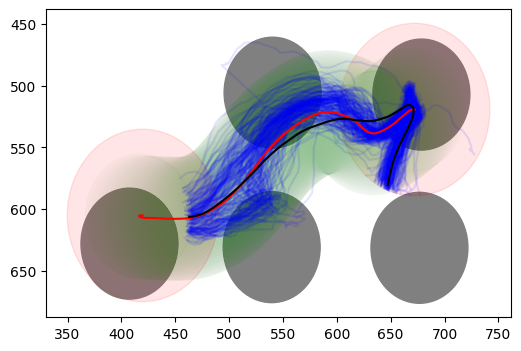

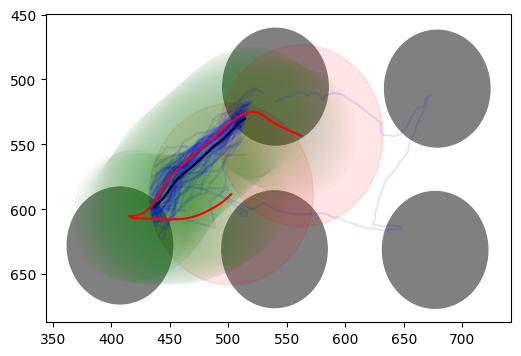

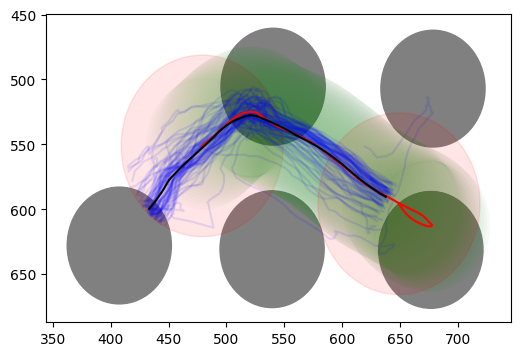

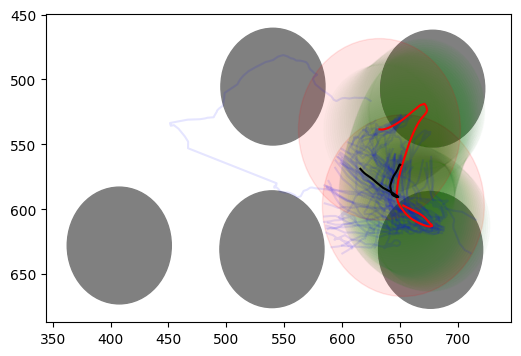

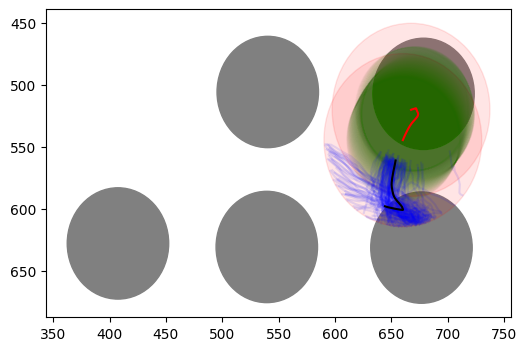

In [434]:

#convert to xy coords
coords = []
for ind_,item in enumerate(current_x):
    coords += [[item,current_y[ind_]]]
    
## each of these is a frame so we know the timing between them. ie. one frame is 1/60s 
fps = 1/np.mean(np.diff(camera_timestamps_df['Time Stamps'].values))
time_filter = 4 #in s
frame_filter = int(time_filter / (1/fps))

for i in range(len(motif_start_ends_df)):
    points = []
    for column in list(motif_start_ends_df):
        row = motif_start_ends_df[(f'{column}')][i]
        points += [row]

    radius_intermediate =50  
    radius_start_end = 70
    inds = find_transition_times(points[0], points[-1], points[1:-1], coords, frame_filter,radius_start_end, radius_intermediate,0)
    
    filtered_inds = []
    for ind in inds:
        traject = coords[ind[0]:ind[1]]
        if len(traject) > 10:
            filtered_inds += [ind]
                        
    # filtered_inds = clean_up_trajectories(filtered_inds, coords, points[0], points[-1], points[1:-1], max_deviation=80)

    fig, ax = plt.subplots(1, 1,figsize=(6, 4))
    for index,port_centroid in enumerate(port_centroids):
        circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
        ax.add_patch(circle1)


    for index,centroid in enumerate(points):
        if index == 0 or index == len(points)-1:
            rad,a,c = radius_start_end,0.1,'red'
        else:
            rad,a,c = radius_intermediate,0.01,'green'

        circle2 = plt.Circle(centroid, rad, color=c, alpha = a)
        ax.add_patch(circle2)


    trajects = []
    for ind in filtered_inds:
        traject = coords[ind[0]:ind[1]]
        trajects += [traject]
        x = [point[0] for point in traject]
        y = [point[1] for point in traject]
        ax.plot(x,y,'-', color = 'blue', alpha = 0.1)
            
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x,y,'-', color = 'red', alpha = 1)
    
    
    av_of_found = interpolate_to_longest_and_find_average_curve(trajects,1000)
    x = [point[0] for point in av_of_found]
    y = [point[1] for point in av_of_found]
    ax.plot(x,y,'-', color = 'k', alpha = 1)
        
    
    
    ax.invert_yaxis()
    
    print(len(filtered_inds))



    
# this is sort of working but not that well. it might be better to use larger circle areas, and some kind of average direction to filter out stuff that on average isnt moving in the right direction... thougb this will be hard with motifs that turn a corner...





31


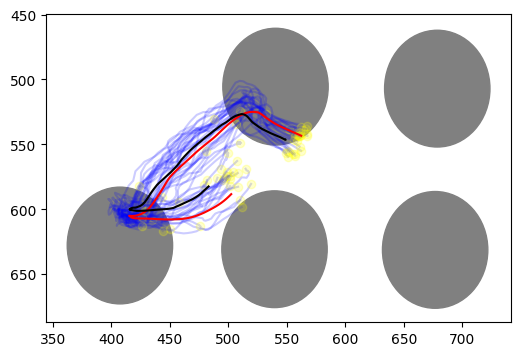

In [660]:
# then remove any duplicates:
valid_trajectories_filtered = remove_overlaps(valid_trajectories)

fig, ax = plt.subplots(1, 1,figsize=(6, 4))
for index,port_centroid in enumerate(port_centroids):
    circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
    ax.add_patch(circle1)

trajects = []
for ind in valid_trajectories_filtered:
    traject = coords[ind[0]:ind[1]]
    trajects += [traject]
    x = [point[0] for point in traject]
    y = [point[1] for point in traject]
    ax.plot(x,y,'-', color = 'blue', alpha = 0.2)
    ax.plot(x[0],y[0],'o', color = 'yellow', alpha = 0.2)
    ax.plot(x[-1],y[-1],'o', color = 'yellow', alpha = 0.2)

x = [point[0] for point in points]
y = [point[1] for point in points]
ax.plot(x,y,'-', color = 'red', alpha = 1)

av_of_found = interpolate_to_longest_and_find_average_curve(trajects,500)
x = [point[0] for point in av_of_found]
y = [point[1] for point in av_of_found]
ax.plot(x,y,'-', color = 'k', alpha = 1)
    
ax.invert_yaxis()

print(len(valid_trajectories_filtered))

262


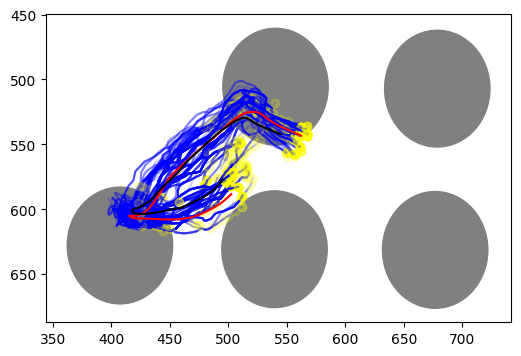

In [657]:
## each of these is a frame so we know the timing between them. ie. one frame is 1/60s 
time_filter = 6 #in s
# minimum distance from start/end centroid
dist_filter = 80
# number of closest points to start/end centroid to find and chose from
num_points = 3
# number of points to add to the start and end of the trajectory
add_start_end = 5
valid_trajectories = process_and_validate_trajectories(coords, similar_segments, points,add_start_end,int(time_filter / (1/fps)),dist_filter,num_points)

# then remove any duplicates:


fig, ax = plt.subplots(1, 1,figsize=(6, 4))
for index,port_centroid in enumerate(port_centroids):
    circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
    ax.add_patch(circle1)

trajects = []
for ind in valid_trajectories:
    traject = coords[ind[0]:ind[1]]
    trajects += [traject]
    x = [point[0] for point in traject]
    y = [point[1] for point in traject]
    ax.plot(x,y,'-', color = 'blue', alpha = 0.2)
    ax.plot(x[0],y[0],'o', color = 'yellow', alpha = 0.2)
    ax.plot(x[-1],y[-1],'o', color = 'yellow', alpha = 0.2)

x = [point[0] for point in points]
y = [point[1] for point in points]
ax.plot(x,y,'-', color = 'red', alpha = 1)

av_of_found = interpolate_to_longest_and_find_average_curve(trajects,500)
x = [point[0] for point in av_of_found]
y = [point[1] for point in av_of_found]
ax.plot(x,y,'-', color = 'k', alpha = 1)
    
ax.invert_yaxis()

print(len(valid_trajectories))


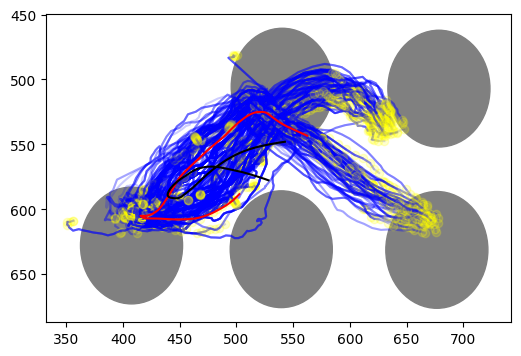

In [643]:

fig, ax = plt.subplots(1, 1,figsize=(6, 4))
for index,port_centroid in enumerate(port_centroids):
    circle1 = plt.Circle(port_centroid, 45, color='grey', alpha = 1)
    ax.add_patch(circle1)

trajects = []
for ind in similar_segments:
    traject = coords[ind[0]:ind[1]]
    trajects += [traject]
    x = [point[0] for point in traject]
    y = [point[1] for point in traject]
    ax.plot(x,y,'-', color = 'blue', alpha = 0.2)
    ax.plot(x[0],y[0],'o', color = 'yellow', alpha = 0.2)
    ax.plot(x[-1],y[-1],'o', color = 'yellow', alpha = 0.2)

x = [point[0] for point in points]
y = [point[1] for point in points]
ax.plot(x,y,'-', color = 'red', alpha = 1)

av_of_found = interpolate_to_longest_and_find_average_curve(trajects,500)
x = [point[0] for point in av_of_found]
y = [point[1] for point in av_of_found]
ax.plot(x,y,'-', color = 'k', alpha = 1)
    
ax.invert_yaxis()

In [2]:
### is there a link between behaviour and the replay we see? 

## load all the replay sessions that i have...
## look for a correlation:
# number of trials
# amount of each motif
# how variable each motif is
# number of errors
# reward rate
# others?

# so i need to load the behavioural data to take standard measures
# then take the tracking data to extract variability
# most complicated will be working out how to map the motifs to the task.. 
# # should be okay because I know where on the linearised task thye sit so i just take these positions. 


# do these correlate with replay rate, a characteristic of replay? motif specific replay? 

In [ ]:
## is there a link between replay and behaviour?

# need session before and after - take basic meausures as before 
# I think take same meausures as before 
# does replay predict a change? 
